<a href="https://colab.research.google.com/github/kahram-y/first-repository/blob/master/WrapUp/stockdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 섹션1. Pandas 라이브러리 사용 -> 데이터를 데이터프레임으로 불러오기

In [2]:
import pandas as pd
df = pd.read_csv('/content/data_2916_20231205.csv', encoding='cp949')

In [3]:
df.columns

Index(['일자', '종가', '대비', '등락률', '시가', '고가', '저가', '거래량', '거래대금', '시가총액',
       '상장주식수'],
      dtype='object')

In [4]:
df = df.rename(columns = {'일자':'date','종가':'Closing Price','대비':'Change','등락률':'Fluctuation Rate','시가':'Opening Price','고가':'High Price','저가':'Low Price','거래량': 'Trading Volume',
    '거래대금': 'Trading Value','시가총액': 'Market Capitalization','상장주식수': 'Number of Listed Shares'})       # 데이터프레임의 칼러명 변경

In [5]:
df = df.drop(columns = 'Number of Listed Shares')     # 불필요한 컬럼 삭제

In [6]:
columns_to_delete = ['Trading Volume','Trading Value','Market Capitalization']
modified_df = df.drop(columns = columns_to_delete)

In [7]:
# 섹션2. Matplotlib -> 데이터프레임을 시각화하기

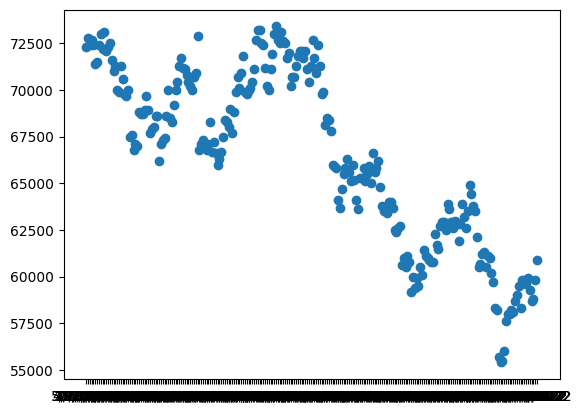

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df['date'], df['Opening Price'])     # 산점도 그리기

Text(0, 0.5, 'Opening Price')

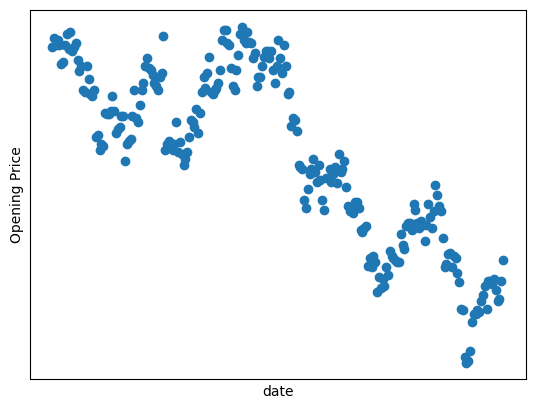

In [9]:
plt.scatter(df['date'], df['Opening Price'])
plt.xticks([])
plt.yticks([])
plt.xlabel('date')
plt.ylabel('Opening Price')

Text(0, 0.5, 'Closing Price')

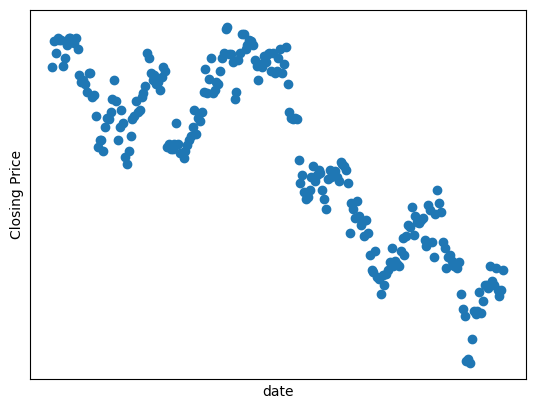

In [10]:
plt.scatter(df['date'], df['Closing Price'])
plt.xticks([])
plt.yticks([])
plt.xlabel('date')
plt.ylabel('Closing Price')


Text(0, 0.5, 'High Price')

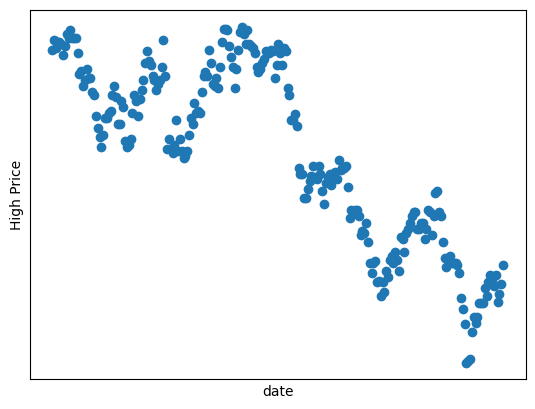

In [11]:
plt.scatter(df['date'], df['High Price'])
plt.xticks([])
plt.yticks([])
plt.xlabel('date')
plt.ylabel('High Price')

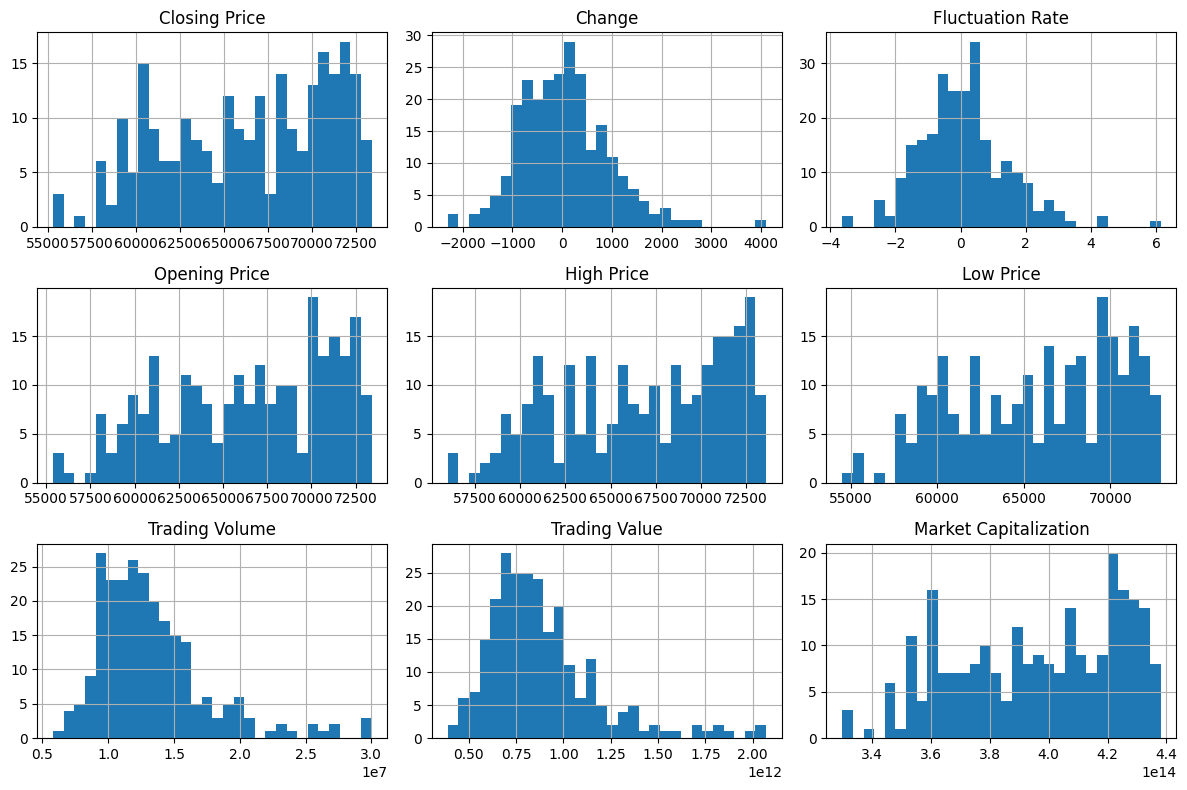

In [12]:
df.hist(figsize = (12,8), bins = 30)     # 히스토그램으로 시각화
plt.tight_layout()
plt.show()

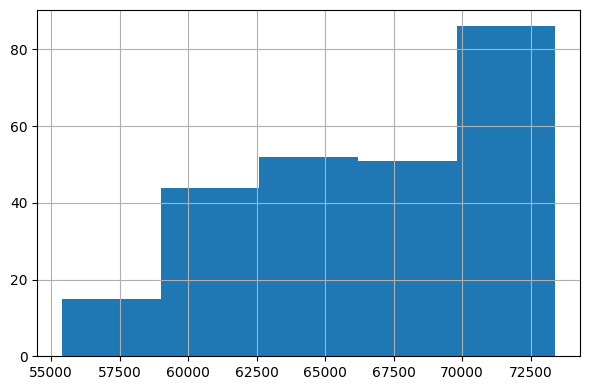

In [13]:
df['Opening Price'].hist(figsize=(6,4),bins=5)
plt.tight_layout()
plt.show()

In [14]:
# 때때로 열의 데이터가 숫자 형식이 아닐 수 있으며, 이런 경우를 대비해 to_numeric을 통해 숫자로 처리함.
#'errors='coerce'' 매개변수는 열 내의 숫자가 아닌 값을 처리하기 위해 사용하는데, 숫자가 아니면 NaN(숫자가 아님)으로 변환함.

df['Closing Price'] = pd.to_numeric(df['Closing Price'], errors='coerce')

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5d5850e090>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5d58530d70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5d58fdab40>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5d58531220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5d58531520>],
 'means': []}

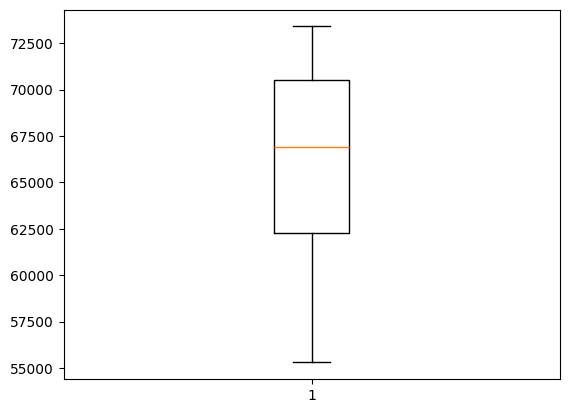

In [15]:
plt.boxplot(df['Closing Price'])        # 종가를 boxplot으로 시각화

In [16]:
# 섹션3. 주가데이터의 컬럼들 간의 상관관계 분석

In [17]:
df['date'] = df['date'].str.replace('/','')       # date 값의 ',' 제거
df['date'] = df['date'].astype(int)           # date 값의 정수화

In [18]:
correlation = df[['date','Opening Price']].corr()     # 상관관계 계산
correlation

,date,Opening Price
date,1.000000,0.049813
Opening Price,0.049813,1.000000


<Axes: >

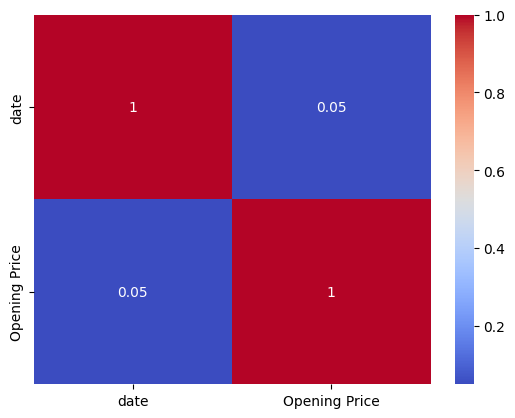

In [19]:
import seaborn as sns
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [20]:
 # 날짜 컬럼와 다른 컬럼들 간의 상관관계 계산
 # 상관관계 높은 순으로 컬럼을 출력함. 양의 상관관계가 강할수록 시간에 따라서 증가하는 변수라고 해석됨.
correlation_with_data = df.corrwith(df['date']).sort_values(ascending=False)
correlation_with_data

,0
date,1.000000
Low Price,0.051357
Opening Price,0.049813
Market Capitalization,0.042248
Closing Price,0.041441
High Price,0.038904
Trading Value,-0.062149
Trading Volume,-0.077965
Change,-0.084795
Fluctuation Rate,-0.092715


In [21]:
# 섹션4. FinanceDataReader 라이브러리 사용 -> 주가 데이터를 가져와서 시각화하기

In [22]:
!pip install --upgrade finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.5 MB/s eta 0:00:00


In [23]:
import FinanceDataReader as fdr
import pandas as pd

In [24]:
df_krx = fdr.StockListing('KRX')      # KRX 시장에 상장된 주식 목록 확인
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,97500,2,-600,-0.61,98500,99900,97300,22803830,2252645721374,577164697395000,5919637922,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,479000,2,-6500,-1.34,497000,502000,478000,4126858,2024408958400,348713132835000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,437000,1,4500,1.04,432500,449500,431000,462927,203817316250,102258000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,1144000,1,9000,0.79,1137000,1150000,1128000,86014,97966924500,81423056000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,77700,1,1700,2.24,76600,79400,76400,5162673,403757136450,63401231392800,815974664,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,236030,KR7236030003,씨알푸드,KONEX,일반기업부,1100,2,-100,-8.33,1020,1100,1020,454,467640,2236665200,2033332,KNX
2873,032685,KR7032681009,소프트센우,KOSDAQ,중견기업부,6200,1,30,0.49,6300,6300,6140,322,1996320,2214280400,357142,KSQ
2874,288490,KR7288490006,나라소프트,KONEX,일반기업부,105,0,0,0.00,0,0,0,0,0,1834515585,17471577,KNX
2875,308700,KR7308700004,테크엔,KONEX,일반기업부,199,0,0,0.00,0,0,0,0,0,1472600000,7400000,KNX


In [25]:
stock_code = '005930'     # 삼성전자 주식코드

In [26]:
df = fdr.DataReader(stock_code,'2022-01-01','2023-01-01')     # 삼성전자 주가 데이터 불러오기 (2022-01-01부터 2023-01-01까지의 데이터)

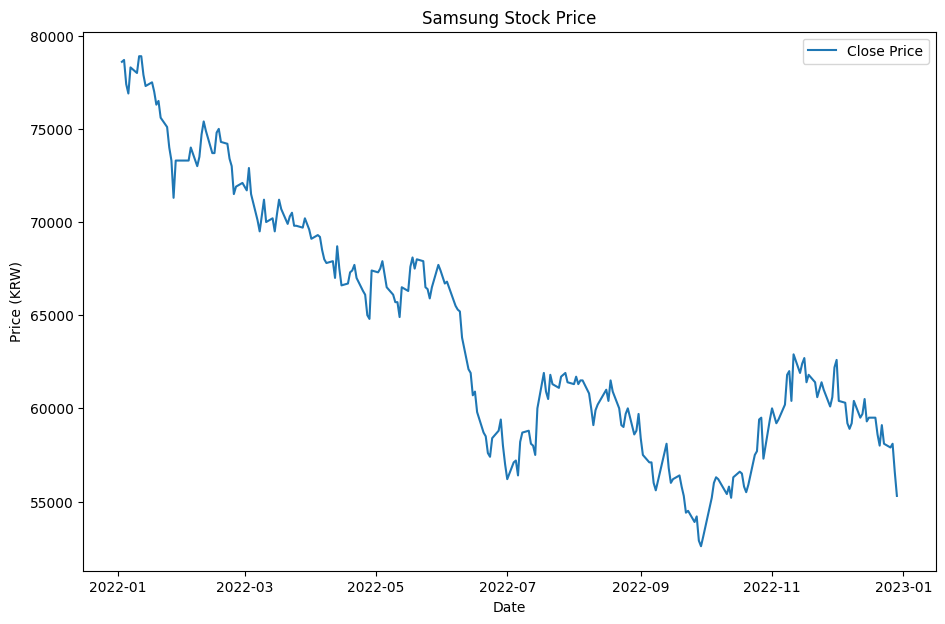

In [27]:
import matplotlib.pyplot as plt         # 주가 시각화하기
plt.figure(figsize=(11,7))
plt.plot(df['Close'],label='Close Price')
plt.title('Samsung Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()

In [28]:
samsung_code ='005930'       # 삼성전자와 카카오 주가 데이터 분석
kakao_code ='035720'

In [29]:
df_samsung = fdr.DataReader(samsung_code, '2022-01-01','2023-01-01')
df_kakao = fdr.DataReader(kakao_code, '2022-01-01','2023-01-01')

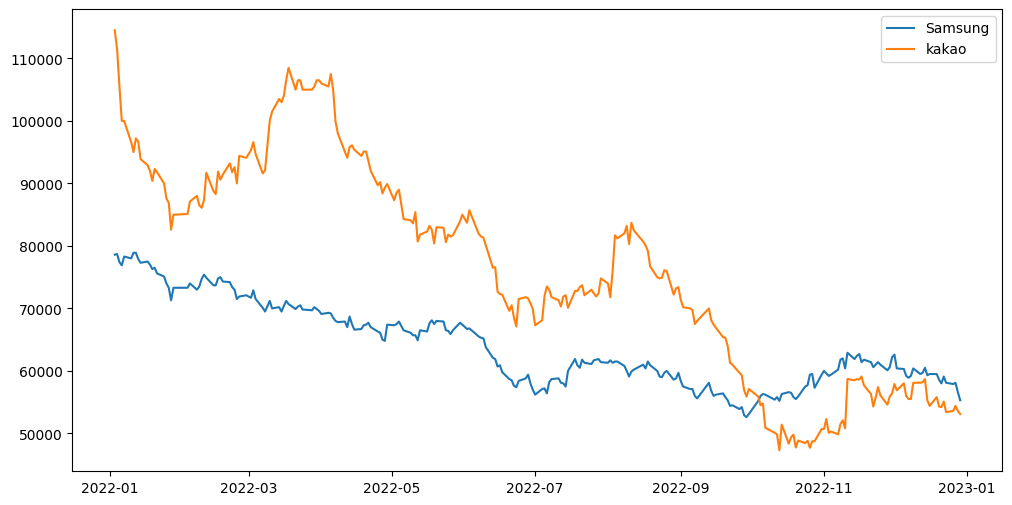

In [30]:
plt.figure(figsize=(12,6))      # 삼성전자와 카카오 종목간 시각화 비교
plt.plot(df_samsung['Close'],label='Samsung')
plt.plot(df_kakao['Close'],label='kakao')
plt.legend()

In [31]:
# 일일 수익률 계산

In [40]:
df = fdr.DataReader('005930', '2015-01-01')     # 삼성전자의 2015-01-01 부터 현재까지의 데이터 불러오기
df.head(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,26799,26799,26540,26600,175499,0.002261
2015-01-05,26720,26720,26260,26660,202790,0.002256
2015-01-06,26300,26340,25760,25900,304710,-0.028507
2015-01-07,25880,26220,25640,26140,286455,0.009266
2015-01-08,26780,26780,26199,26280,289552,0.005356


In [33]:
df = (df['Close'].pct_change()) * 100       # 종가 기준으로 일별수익률 계산

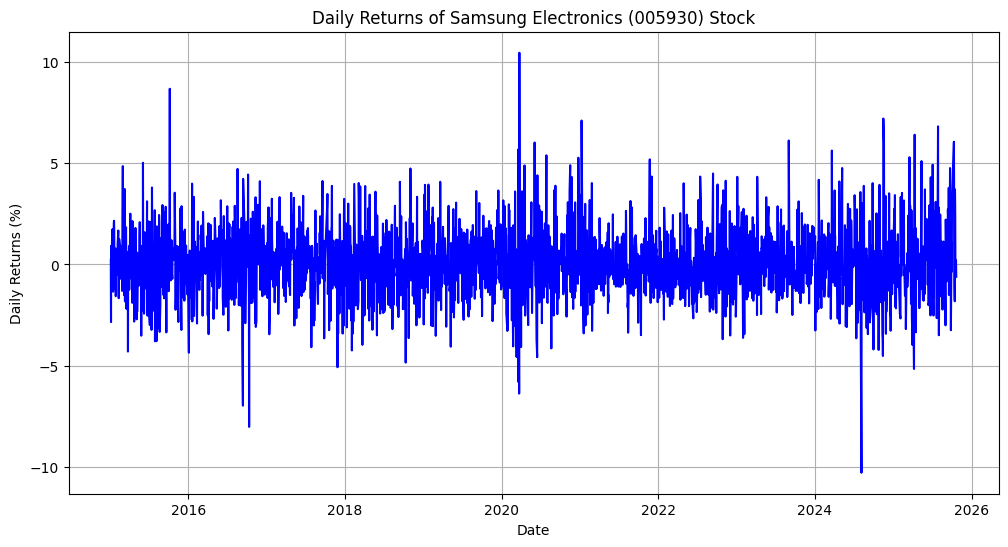

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df,color='b', linestyle='-')     # df.index(데이터의 날짜)를 x 축, df(일별 수익률 데이터)를 y 축으로 하여 plot해보기
plt.title('Daily Returns of Samsung Electronics (005930) Stock')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.grid(True)
plt.show()

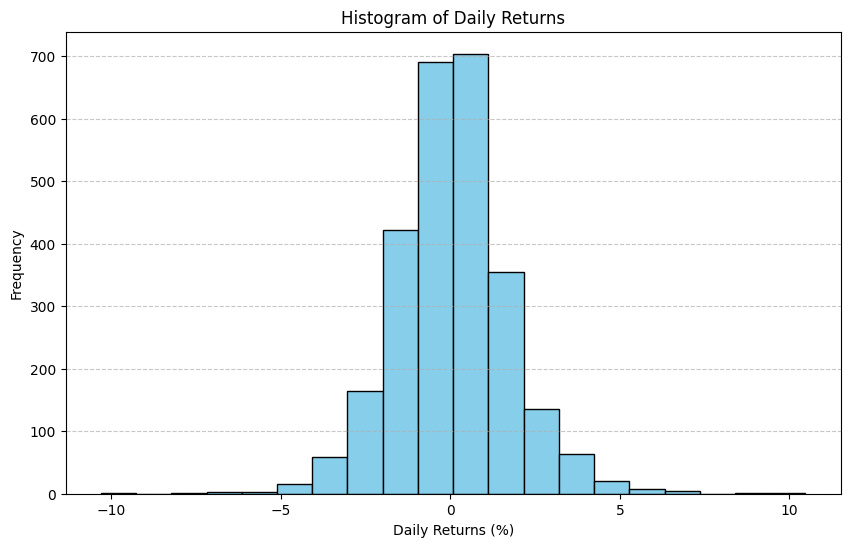

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))     # 히스토그램으로 시각화
plt.hist(df, bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Frequency')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

In [45]:
# 2022년 중 주가상승일의 비율 계산
df[df.index] = pd.to_datetime(df.index)   # 날짜 컬럼('Date')을 날짜형(datetime)으로 변환
df.set_index(df.index, inplace=True)        # loc구문에서 사용될 인덱스로 설정

df1 = df.loc['2022-01-01':'2022-12-31']
df2['ret'] = (df1['Close'].pct_change())*100
df3 = df2['ret']
df3

,Close
Date,
2022-01-03,NaN
2022-01-04,0.127226
2022-01-05,-1.651842
2022-01-06,-0.645995
2022-01-07,1.820546
...,...
2022-12-23,-1.692047
2022-12-26,-0.344234
2022-12-27,0.345423


In [46]:
r = df3.dropna()    # 결과값에서 결측지를 제거
len(r)

245

In [47]:
positive = 0        # 양의 일별 수익률의 개수(일수) 계산
n = len(r)
for i in range(n):
    if r[i]>0:
        positive += 1
positive

/tmp/ipython-input-164975267.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if r[i]>0:


103

In [48]:
negative = n - positive     # 양이 아닌 일별 수익률의 개수(일수) 계산

In [49]:
positive_rate = positive / n        # 수익이 증가한 날의 비율 계산
positive_rate

0.4204081632653061

In [50]:
# 주가등락 계산: 이항분포확률을 통해 5일 중에서 3일동안 주가가 오를 확률 계산
import math
a = math.factorial(5)
b = math.factorial(3) * math.factorial(2)
number = a/b

c = ((positive_rate)**3)*((1-positive_rate)**2)     # 주가가 상승할 확률이 2번 발생하고, 그러하지 않을 확률이 2번 발생하는 확률을 계산
prob = number * c
prob

0.24960767847522106

In [51]:
# 참고 자료
# 이진규, 파이썬으로 하는 주가 데이터 분석 입문(금융/퀀트), 인프런(Inflearn), 온라인 강의.
# URL: https://www.inflearn.com/course/주가-데이터-분석-입문